In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [194]:
data_path = 'data/'

shops = pd.read_parquet(data_path + 'shops.parquet')

In [195]:
shops

,shop_id,neighborhood,city,year_opened,is_on_the_road,is_with_the_well,is_with_additional_services,shop_type
0,705,В центре,Крепость Джита,2109,нет,да,да,1
1,601,В центре,Суховей,2137,нет,нет,нет,4
2,530,В центре,Храм Фритюра,2118,нет,нет,нет,None
3,91,В центре,Убежище Жестянщика,2135,нет,нет,да,1
4,100,На отшибе,Убежище Жестянщика,2135,да,нет,да,2
...,...,...,...,...,...,...,...,...
840,663,У тоннеля,Темница,2139,нет,нет,нет,4
841,804,В центре,Пасть,-1,нет,None,None,4
842,272,У ночлега,Крепость Джита,2117,нет,нет,нет,3
843,715,У ночлега,Крепость Джита,2123,нет,нет,нет,3


In [20]:
sales_pivoted = pd.read_csv('sales_pivoted.csv')

In [10]:
sales_pivoted.groupby('shop_id').size().sort_values()

shop_id
0      699
556    699
557    699
558    699
559    699
      ... 
285    699
286    699
287    699
263    699
844    699
Length: 845, dtype: int64

In [21]:
goods = sales_pivoted.iloc[:, 2:-1].columns

# Процентное увеличение по сравнению со следующим днем

In [22]:
data = sales_pivoted.copy()

In [23]:
for good in goods:
    print(good)
    data[good] = data.groupby('shop_id')[good]\
                     .rolling(2)\
                     .apply(lambda x: (x.iloc[-1] - x.iloc[0])/x.iloc[0])\
                     .reset_index(drop = True)

Бензак
Броня и одежда
Жидкости для тачки
Медпрепараты и еда
Модификации тачки
Оружие
Патроны
Солярка
Съедобный хлам
Хлам
Ядер-Кола


In [27]:
data = data.fillna(0)
data = data.replace(np.inf, 1)
data = data.replace(-np.inf, -1)

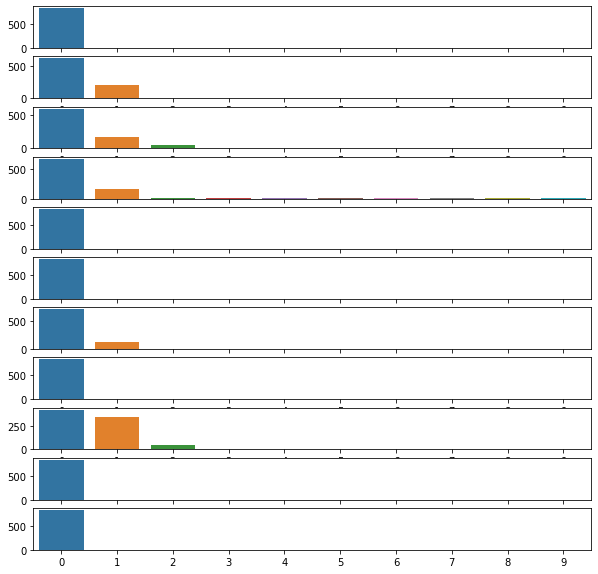

In [55]:
fig, ax = plt.subplots(11, 1, figsize = (10, 10))
i = 0
for good in goods:
    data_to_cluster = pd.pivot_table(data, index = 'shop_id', columns = 'date', values = good)
    kmeans = KMeans(n_clusters = 10)
    kmeans.fit(data_to_cluster.values)
    pd.Series(kmeans.labels_).value_counts()
    _ = sns.barplot(x = list(range(0, 10)), y = pd.Series(kmeans.labels_).value_counts().values, ax = ax[i])
    i = i+1

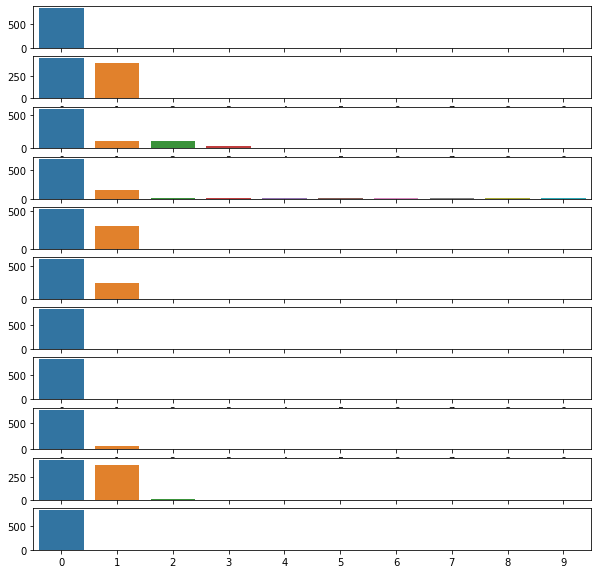

In [58]:
fig, ax = plt.subplots(11, 1, figsize = (10, 10))
i = 0
for good in goods:
    data_to_cluster = pd.pivot_table(data, index = 'shop_id', columns = 'date', values = good)
    kmeans = AgglomerativeClustering(n_clusters = 10)
    kmeans.fit(data_to_cluster.values)
    pd.Series(kmeans.labels_).value_counts()
    _ = sns.barplot(x = list(range(0, 10)), y = pd.Series(kmeans.labels_).value_counts().values, ax = ax[i])
    i = i+1

# Процентное увеличения скользящего среднего за 7 дней

In [75]:
data_mean = sales_pivoted.copy()

In [76]:
for good in goods:
    print(good)
    data_mean[good] = data_mean.groupby('shop_id')[good]\
                               .rolling(7)\
                               .apply(lambda x: np.mean(x))\
                               .reset_index(drop = True)

Бензак
Броня и одежда
Жидкости для тачки
Медпрепараты и еда
Модификации тачки
Оружие
Патроны
Солярка
Съедобный хлам
Хлам
Ядер-Кола


In [105]:
data_mean_rolling_1 = data_mean.copy()

In [106]:
for good in goods:
    print(good)
    data_mean_rolling_1[good] = data_mean_rolling_1.groupby('shop_id')[good]\
                                                   .rolling(2)\
                                                   .apply(lambda x: (x.iloc[-1] - x.iloc[0])/x.iloc[0])\
                                                   .reset_index(drop = True)

Бензак
Броня и одежда
Жидкости для тачки
Медпрепараты и еда
Модификации тачки
Оружие
Патроны
Солярка
Съедобный хлам
Хлам
Ядер-Кола


In [108]:
data_mean_rolling_1 = data_mean_rolling_1.fillna(0)
data_mean_rolling_1 = data_mean_rolling_1.replace(np.inf, 1)
data_mean_rolling_1 = data_mean_rolling_1.replace(-np.inf, -1)

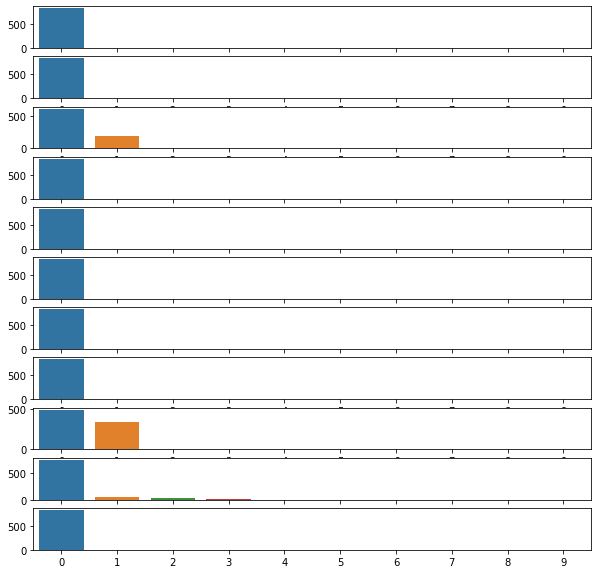

In [109]:
fig, ax = plt.subplots(11, 1, figsize = (10, 10))
i = 0
for good in goods:
    data_to_cluster = pd.pivot_table(data_mean_rolling_1, index = 'shop_id', columns = 'date', values = good)
    kmeans = KMeans(n_clusters = 10)
    kmeans.fit(data_to_cluster.values)
    pd.Series(kmeans.labels_).value_counts()
    _ = sns.barplot(x = list(range(0, 10)), y = pd.Series(kmeans.labels_).value_counts().values, ax = ax[i])
    i = i+1

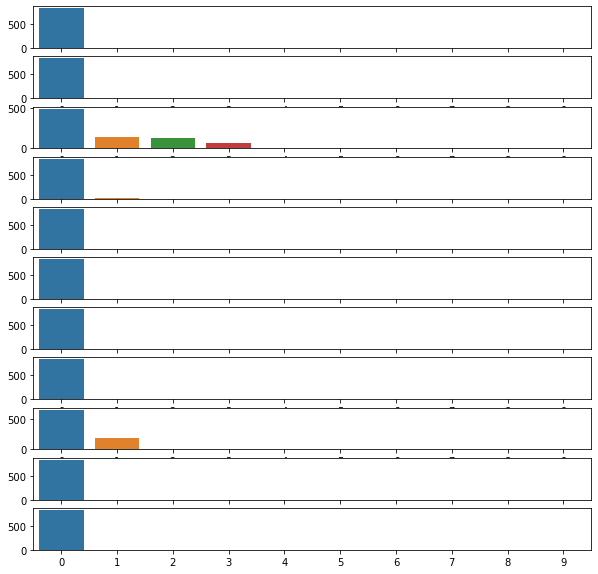

In [110]:
fig, ax = plt.subplots(11, 1, figsize = (10, 10))
i = 0
for good in goods:
    data_to_cluster = pd.pivot_table(data_mean_rolling_1, index = 'shop_id', columns = 'date', values = good)
    kmeans = AgglomerativeClustering(n_clusters = 10)
    kmeans.fit(data_to_cluster.values)
    pd.Series(kmeans.labels_).value_counts()
    _ = sns.barplot(x = list(range(0, 10)), y = pd.Series(kmeans.labels_).value_counts().values, ax = ax[i])
    i = i+1

In [111]:
data_mean_rolling_6 = data_mean.copy()

In [112]:
for good in goods:
    print(good)
    data_mean_rolling_6[good] = data_mean_rolling_6.groupby('shop_id')[good]\
                                                   .rolling(8)\
                                                   .apply(lambda x: (x.iloc[-1] - x.iloc[0])/x.iloc[0])\
                                                   .reset_index(drop = True)

Бензак
Броня и одежда
Жидкости для тачки
Медпрепараты и еда
Модификации тачки
Оружие
Патроны
Солярка
Съедобный хлам
Хлам
Ядер-Кола


In [113]:
data_mean_rolling_6 = data_mean_rolling_6.fillna(0)
data_mean_rolling_6 = data_mean_rolling_6.replace(np.inf, 1)
data_mean_rolling_6 = data_mean_rolling_6.replace(-np.inf, -1)

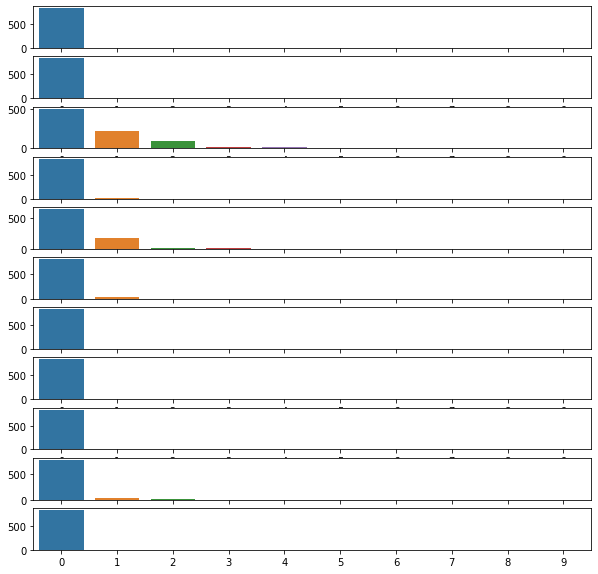

In [114]:
fig, ax = plt.subplots(11, 1, figsize = (10, 10))
i = 0
for good in goods:
    data_to_cluster = pd.pivot_table(data_mean_rolling_6, index = 'shop_id', columns = 'date', values = good)
    kmeans = KMeans(n_clusters = 10)
    kmeans.fit(data_to_cluster.values)
    pd.Series(kmeans.labels_).value_counts()
    _ = sns.barplot(x = list(range(0, 10)), y = pd.Series(kmeans.labels_).value_counts().values, ax = ax[i])
    i = i+1

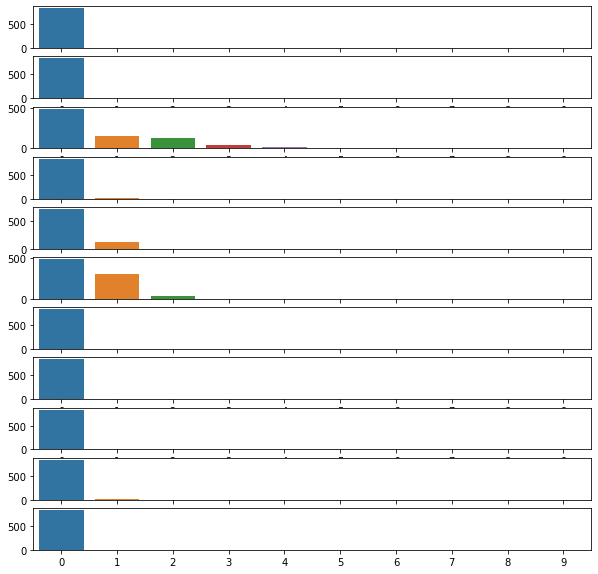

In [115]:
fig, ax = plt.subplots(11, 1, figsize = (10, 10))
i = 0
for good in goods:
    data_to_cluster = pd.pivot_table(data_mean_rolling_6, index = 'shop_id', columns = 'date', values = good)
    kmeans = AgglomerativeClustering(n_clusters = 10)
    kmeans.fit(data_to_cluster.values)
    pd.Series(kmeans.labels_).value_counts()
    _ = sns.barplot(x = list(range(0, 10)), y = pd.Series(kmeans.labels_).value_counts().values, ax = ax[i])
    i = i+1

In [116]:
data_mean_14 = sales_pivoted.copy()

In [117]:
for good in goods:
    print(good)
    data_mean_14[good] = data_mean_14.groupby('shop_id')[good]\
                                     .rolling(14)\
                                     .apply(lambda x: np.mean(x))\
                                     .reset_index(drop = True)

Бензак
Броня и одежда
Жидкости для тачки
Медпрепараты и еда
Модификации тачки
Оружие
Патроны
Солярка
Съедобный хлам
Хлам
Ядер-Кола


In [118]:
data_mean_rolling_1 = data_mean_14.copy()

In [119]:
for good in goods:
    print(good)
    data_mean_rolling_1[good] = data_mean_rolling_1.groupby('shop_id')[good]\
                                                   .rolling(2)\
                                                   .apply(lambda x: (x.iloc[-1] - x.iloc[0])/x.iloc[0])\
                                                   .reset_index(drop = True)

Бензак
Броня и одежда
Жидкости для тачки
Медпрепараты и еда
Модификации тачки
Оружие
Патроны
Солярка
Съедобный хлам
Хлам
Ядер-Кола


In [120]:
data_mean_rolling_1 = data_mean_rolling_1.fillna(0)
data_mean_rolling_1 = data_mean_rolling_1.replace(np.inf, 1)
data_mean_rolling_1 = data_mean_rolling_1.replace(-np.inf, -1)

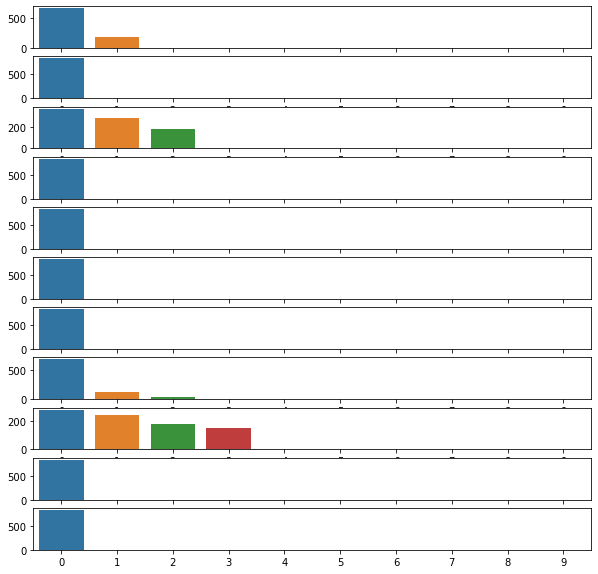

In [121]:
fig, ax = plt.subplots(11, 1, figsize = (10, 10))
i = 0
for good in goods:
    data_to_cluster = pd.pivot_table(data_mean_rolling_1, index = 'shop_id', columns = 'date', values = good)
    kmeans = KMeans(n_clusters = 10)
    kmeans.fit(data_to_cluster.values)
    pd.Series(kmeans.labels_).value_counts()
    _ = sns.barplot(x = list(range(0, 10)), y = pd.Series(kmeans.labels_).value_counts().values, ax = ax[i])
    i = i+1

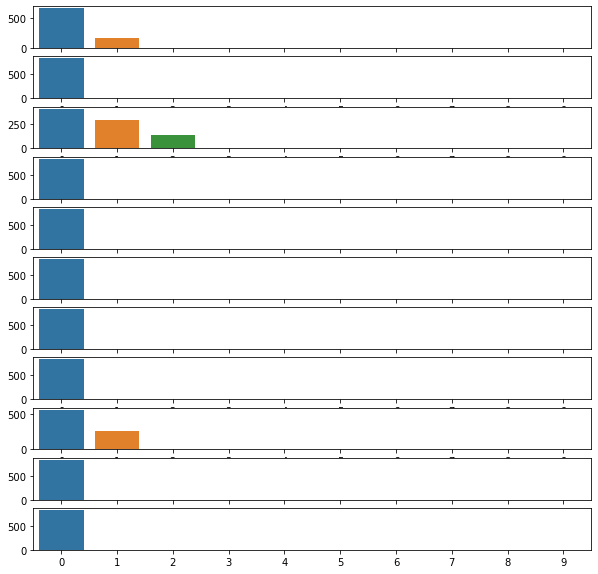

In [122]:
fig, ax = plt.subplots(11, 1, figsize = (10, 10))
i = 0
for good in goods:
    data_to_cluster = pd.pivot_table(data_mean_rolling_1, index = 'shop_id', columns = 'date', values = good)
    kmeans = AgglomerativeClustering(n_clusters = 10)
    kmeans.fit(data_to_cluster.values)
    pd.Series(kmeans.labels_).value_counts()
    _ = sns.barplot(x = list(range(0, 10)), y = pd.Series(kmeans.labels_).value_counts().values, ax = ax[i])
    i = i+1

In [123]:
data_mean_rolling_7 = data_mean_14.copy()

In [124]:
for good in goods:
    print(good)
    data_mean_rolling_7[good] = data_mean_rolling_7.groupby('shop_id')[good]\
                                                   .rolling(8)\
                                                   .apply(lambda x: (x.iloc[-1] - x.iloc[0])/x.iloc[0])\
                                                   .reset_index(drop = True)

Бензак
Броня и одежда
Жидкости для тачки
Медпрепараты и еда
Модификации тачки
Оружие
Патроны
Солярка
Съедобный хлам
Хлам
Ядер-Кола


In [125]:
data_mean_rolling_7 = data_mean_rolling_7.fillna(0)
data_mean_rolling_7 = data_mean_rolling_7.replace(np.inf, 1)
data_mean_rolling_7 = data_mean_rolling_7.replace(-np.inf, -1)

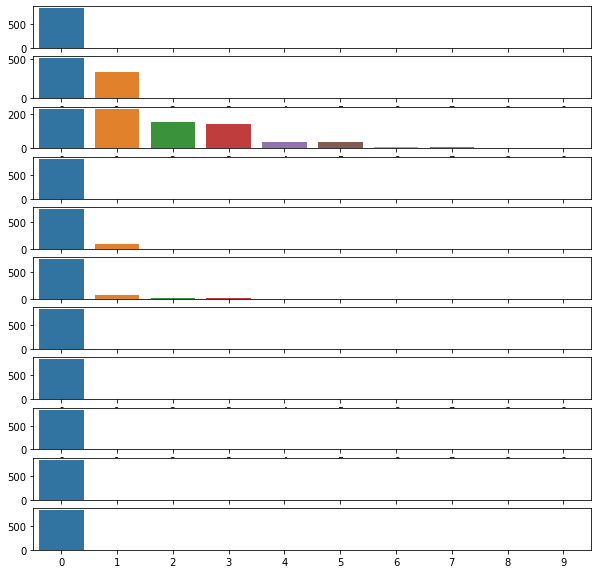

In [126]:
fig, ax = plt.subplots(11, 1, figsize = (10, 10))
i = 0
for good in goods:
    data_to_cluster = pd.pivot_table(data_mean_rolling_7, index = 'shop_id', columns = 'date', values = good)
    kmeans = KMeans(n_clusters = 10)
    kmeans.fit(data_to_cluster.values)
    pd.Series(kmeans.labels_).value_counts()
    _ = sns.barplot(x = list(range(0, 10)), y = pd.Series(kmeans.labels_).value_counts().values, ax = ax[i])
    i = i+1

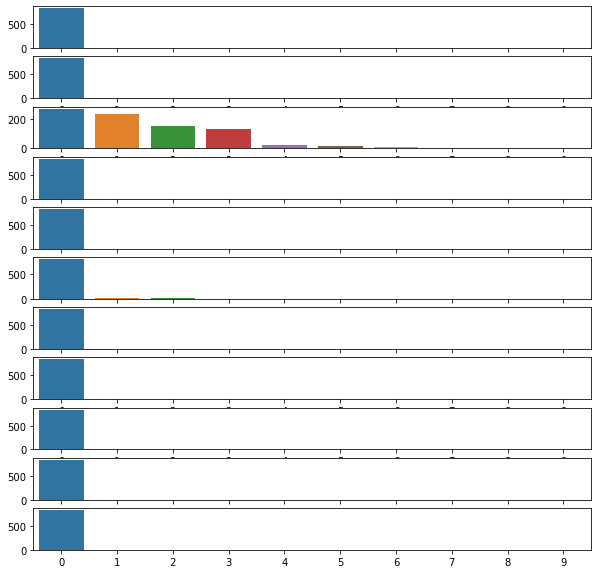

In [127]:
fig, ax = plt.subplots(11, 1, figsize = (10, 10))
i = 0
for good in goods:
    data_to_cluster = pd.pivot_table(data_mean_rolling_7, index = 'shop_id', columns = 'date', values = good)
    kmeans = AgglomerativeClustering(n_clusters = 10)
    kmeans.fit(data_to_cluster.values)
    pd.Series(kmeans.labels_).value_counts()
    _ = sns.barplot(x = list(range(0, 10)), y = pd.Series(kmeans.labels_).value_counts().values, ax = ax[i])
    i = i+1

In [185]:
data_mean_14_copy = data_mean_14.copy()

In [186]:
def scaling(x):
    scaler = MinMaxScaler()
    x = scaler.fit_transform(x.values.reshape(-1, 1)).flatten()
    return(pd.Series(x))

In [187]:
for good in goods:
    print(good)
    data_mean_14_copy[good] = data_mean_14_copy.groupby('shop_id')[good].apply(scaling).reset_index(drop = True)

Бензак
Броня и одежда
Жидкости для тачки
Медпрепараты и еда
Модификации тачки
Оружие
Патроны
Солярка
Съедобный хлам
Хлам
Ядер-Кола


In [189]:
data_mean_14_copy = data_mean_14_copy.fillna(0)
data_mean_14_copy = data_mean_14_copy.replace(np.inf, 1)
data_mean_14_copy = data_mean_14_copy.replace(-np.inf, -1)

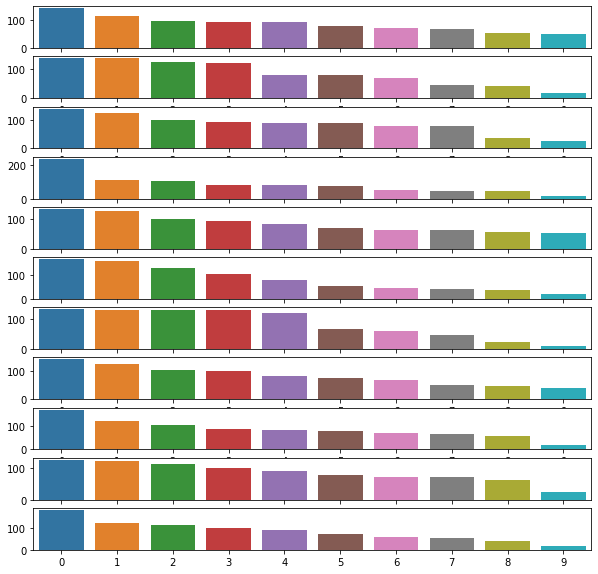

In [190]:
fig, ax = plt.subplots(11, 1, figsize = (10, 10))
i = 0
for good in goods:
    data_to_cluster = pd.pivot_table(data_mean_14_copy, index = 'shop_id', columns = 'date', values = good)
    kmeans = KMeans(n_clusters = 10)
    kmeans.fit(data_to_cluster.values)
    pd.Series(kmeans.labels_).value_counts()
    _ = sns.barplot(x = list(range(0, 10)), y = pd.Series(kmeans.labels_).value_counts().values, ax = ax[i])
    i = i+1

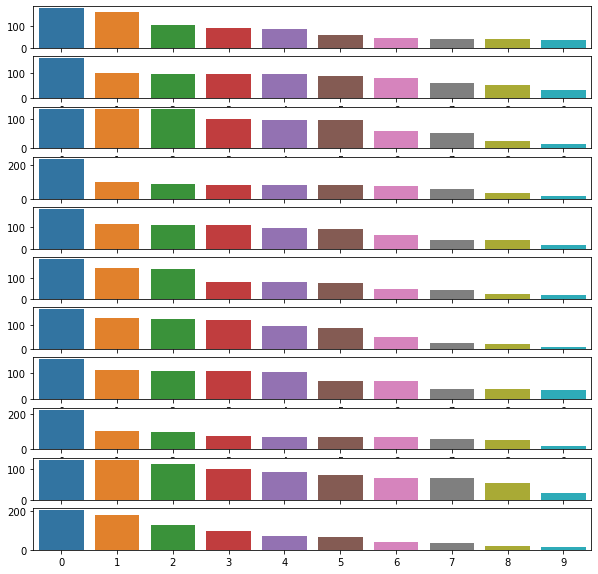

In [191]:
fig, ax = plt.subplots(11, 1, figsize = (10, 10))
i = 0
for good in goods:
    data_to_cluster = pd.pivot_table(data_mean_14_copy, index = 'shop_id', columns = 'date', values = good)
    kmeans = AgglomerativeClustering(n_clusters = 10)
    kmeans.fit(data_to_cluster.values)
    pd.Series(kmeans.labels_).value_counts()
    _ = sns.barplot(x = list(range(0, 10)), y = pd.Series(kmeans.labels_).value_counts().values, ax = ax[i])
    i = i+1

In [193]:
np.corrcoef([0, 1, 2, 3, 2, 1, 0], [1, 2, 3, 4, 3, 2, 1])

array([[1., 1.],
       [1., 1.]])